<b>Ajwaa or Medjool</b>

---


Klasifikasi pada Kurma Ajwa/Medjool menggunakan K-Nearest Neighbour

<b>Kelompok: </b>

Anggota:
1. Bagas Eko Tjahyono Putro - 1301223279
2. Faiz Maula Ahmad Edwin Putra - 1301223017
3. Muhammad Adnansyah - 1301223460

#### Pendahuluan

Kami akan menggunakan dataset yang terdiri dari dua jenis kurma: Ajwa dan Medjool. Dataset ini mencakup berbagai fitur seperti panjang buah, diameter buah, berat buah, panjang biji, kalori, dan warna, yang dapat membantu membedakan antara kedua jenis kurma tersebut.

Masalah yang ingin diselesaikan adalah klasifikasi jenis kurma berdasarkan fitur-fitur yang telah disebutkan. Kami akan menggunakan metode K-Nearest Neighbors (KNN) untuk mengklasifikasikan apakah sebuah kurma adalah jenis Ajwa atau Medjool berdasarkan fitur-fiturnya.

**Exploration Data Analysis**

Disini kami mengeksplorasi dan menganalisis data untuk menentukan langkah apa yang akan diambil selanjutnya

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Menampilkan data yang akan diolah
data = pd.read_csv("AjwaOrMejdool.csv")
data.head()

,DateLength_cm,DateDiameter_cm,DateWeight_g,PitLength_cm,Calories_Kcal,Color,Class
0,3.2,2.0,12,2.2,41.28,Black,Ajwa
1,3.5,1.8,11,1.9,37.84,Black,Ajwa
2,3.0,1.7,9,2.0,30.96,Black,Ajwa
3,3.1,2.0,10,1.9,34.40,Black,Ajwa
4,2.8,1.8,9,1.9,30.96,Black,Ajwa


In [54]:
#Mengubah nama dari setiap fitur agar mudah dikenali
data = data.rename(
    columns={'DateLength_cm': 'panjang_buah', 
            'DateDiameter_cm' : 'diameter_buah', 
            'DateWeight_g' : 'berat_buah', 
            'PitLength_cm' : 'panjang_biji', 
            'Calories_Kcal' : 'kalori', 
            'Color' : 'warna', 
            'Class' : 'jenis'}
)

data.to_csv('dataKurma_indo.csv')

In [55]:
# Menampilkan data yang sudah diubah dan akan diolah
data = pd.read_csv("dataKurma_indo.csv", index_col=0)
data

,panjang_buah,diameter_buah,berat_buah,panjang_biji,kalori,warna,jenis
0,3.2,2.0,12,2.2,41.28,Black,Ajwa
1,3.5,1.8,11,1.9,37.84,Black,Ajwa
2,3.0,1.7,9,2.0,30.96,Black,Ajwa
3,3.1,2.0,10,1.9,34.40,Black,Ajwa
4,2.8,1.8,9,1.9,30.96,Black,Ajwa
5,3.1,1.9,12,2.2,41.28,Black,Ajwa
6,3.2,2.2,13,1.9,44.72,Black,Ajwa
7,3.1,1.7,12,2.1,41.28,Black,Ajwa
8,3.6,2.5,9,2.7,30.96,Black,Ajwa
9,3.8,1.8,10,1.9,34.40,Black,Ajwa


In [56]:
# Menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   panjang_buah   20 non-null     float64
 1   diameter_buah  20 non-null     float64
 2   berat_buah     20 non-null     int64  
 3   panjang_biji   20 non-null     float64
 4   kalori         20 non-null     float64
 5   warna          20 non-null     object 
 6   jenis          20 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ KB


In [57]:
# Menampilkan deskripsi data
data.describe()

,panjang_buah,diameter_buah,berat_buah,panjang_biji,kalori
count,20.000000,20.00000,20.000000,20.000000,20.00000
mean,4.005000,1.87500,13.150000,2.280000,43.05200
std,0.853769,0.28631,2.978431,0.347321,8.27551
min,2.800000,1.40000,9.000000,1.900000,30.96000
25%,3.175000,1.70000,10.750000,1.975000,36.98000
50%,4.000000,1.80000,13.000000,2.200000,42.76000
75%,5.000000,2.00000,15.250000,2.625000,48.19000
max,5.200000,2.50000,19.000000,2.900000,60.04000


In [58]:
# Mengecek data yang hilang
print(data.isnull().sum())

panjang_buah     0
diameter_buah    0
berat_buah       0
panjang_biji     0
kalori           0
warna            0
jenis            0
dtype: int64


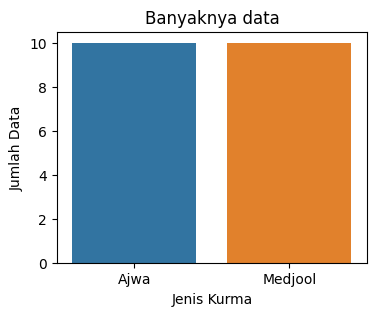

In [59]:
#Melihat jumlah data target
plt.figure(figsize=(4, 3))
sns.countplot(x='jenis', data=data)
plt.xlabel('Jenis Kurma')
plt.ylabel('Jumlah Data')
plt.title('Banyaknya data')
plt.show()

**Data Preprocessing**

Setelah melakukan eksplorisasi dan menganalisis data, selanjutnya kami melakukan pemrosesan data untuk mendapatkan data yang sesuai pada langkah perancangan model

In [60]:
# Mapping target variables
target_jenis = {'Ajwa': 0, 'Medjool': 1}
target_warna = {'Black': 0, 'Brown': 1}

data['jenis'] = data['jenis'].map(target_jenis)
data['warna'] = data['warna'].map(target_warna)

In [61]:
# Sampling data
data = data.sample(20).reset_index(drop=True)

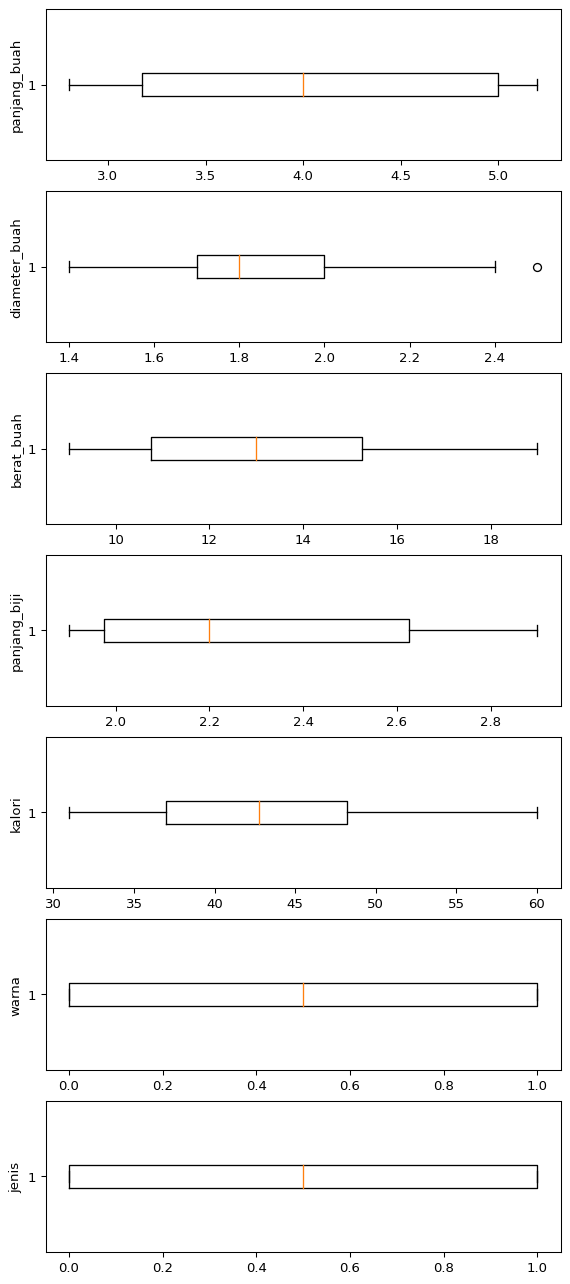

In [62]:
# Box Plots untuk melihat outliers
fig, axs = plt.subplots(7, 1, dpi=95, figsize=(7, 17))
i = 0
for col in data.columns:
    axs[i].boxplot(data[col], vert=False)
    axs[i].set_ylabel(col)
    i += 1
plt.show()

In [63]:
# Deteksi Outliers
Q1 = data['diameter_buah'].quantile(0.25)
Q3 = data['diameter_buah'].quantile(0.75)
IQR = Q3 - Q1

Batas_Bawah = Q1 - 1.5 * IQR
Batas_Atas = Q3 + 1.5 * IQR

print("Batas Bawah untuk outlier: ", Batas_Bawah)
print("Batas Atas untuk outlier: ", Batas_Atas)

Batas Bawah untuk outlier:  1.25
Batas Atas untuk outlier:  2.45


In [64]:
data['outlier'] = (data['diameter_buah'] < Batas_Bawah) | (data['diameter_buah'] > Batas_Atas)
data

,panjang_buah,diameter_buah,berat_buah,panjang_biji,kalori,warna,jenis,outlier
0,5.0,1.4,15,2.5,47.40,1,1,False
1,4.4,2.0,14,2.9,44.24,1,1,False
2,5.0,2.0,17,2.0,53.72,1,1,False
3,4.6,1.7,13,2.7,41.08,1,1,False
4,2.8,1.8,9,1.9,30.96,0,0,False
5,4.2,1.6,14,2.3,44.24,1,1,False
6,3.1,1.7,12,2.1,41.28,0,0,False
7,5.2,1.4,17,2.6,53.72,1,1,False
8,5.0,2.4,19,2.8,60.04,1,1,False
9,5.1,2.1,16,2.7,50.56,1,1,False


In [65]:
dataBersih = data[~data['outlier']]
dataBersih

,panjang_buah,diameter_buah,berat_buah,panjang_biji,kalori,warna,jenis,outlier
0,5.0,1.4,15,2.5,47.40,1,1,False
1,4.4,2.0,14,2.9,44.24,1,1,False
2,5.0,2.0,17,2.0,53.72,1,1,False
3,4.6,1.7,13,2.7,41.08,1,1,False
4,2.8,1.8,9,1.9,30.96,0,0,False
5,4.2,1.6,14,2.3,44.24,1,1,False
6,3.1,1.7,12,2.1,41.28,0,0,False
7,5.2,1.4,17,2.6,53.72,1,1,False
8,5.0,2.4,19,2.8,60.04,1,1,False
9,5.1,2.1,16,2.7,50.56,1,1,False


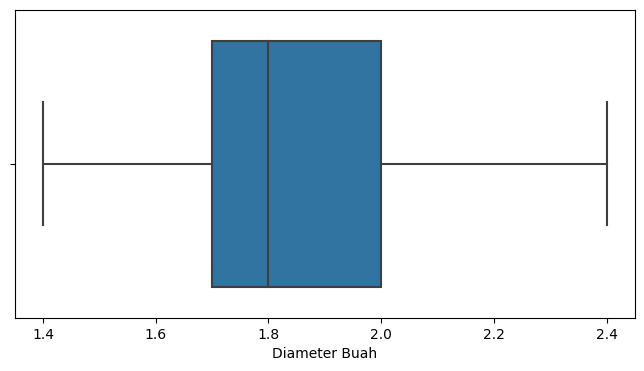

In [66]:
# Plot tanpa outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=dataBersih['diameter_buah'])
plt.xlabel('Diameter Buah')
plt.show()

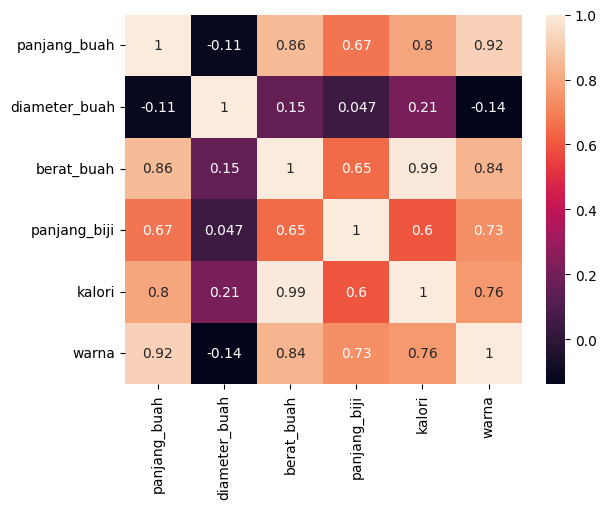

In [67]:
# Visualisasi korelasi
data3 = dataBersih.drop(['jenis', 'outlier'], axis=1)
sns.heatmap(data3.corr(), annot=True)
plt.show()

In [68]:
dataNumerik = dataBersih.drop(['jenis', 'outlier'], axis=1)
data_target = dataBersih['jenis']

# Normalisasi data
normalisasi = (dataNumerik - dataNumerik.min()) / (dataNumerik.max() - dataNumerik.min())
normalisasi.describe()

,panjang_buah,diameter_buah,berat_buah,panjang_biji,kalori,warna
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.510965,0.442105,0.436842,0.357895,0.437704,0.526316
std,0.363200,0.252357,0.289080,0.342078,0.274540,0.512989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145833,0.300000,0.250000,0.050000,0.292297,0.000000
50%,0.583333,0.400000,0.400000,0.300000,0.456671,1.000000
75%,0.916667,0.600000,0.650000,0.650000,0.619670,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
normalized_data = pd.concat([normalisasi, data_target], axis=1)
normalized_data.head()

,panjang_buah,diameter_buah,berat_buah,panjang_biji,kalori,warna,jenis
0,0.916667,0.0,0.6,0.6,0.565337,1.0,1
1,0.666667,0.6,0.5,1.0,0.456671,1.0,1
2,0.916667,0.6,0.8,0.1,0.782669,1.0,1
3,0.750000,0.3,0.4,0.8,0.348006,1.0,1
4,0.000000,0.4,0.0,0.0,0.000000,0.0,0


**Data Splitting**

Di sini, dataset dibagi dengan perbandingan 7:3, di mana 70% digunakan untuk training dan 30% untuk testing.

In [70]:
# Fungsi untuk membagi data menjadi data latih dan data uji
def train_test_split(X, y, test_size=0.3):
    split_index = int(len(X) * (1 - test_size))
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
    return X_train, X_test, y_train, y_test

In [71]:
X = normalized_data.drop('jenis', axis=1)
y = normalized_data['jenis']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Metode yang Digunakan
K-Nearest Neighbors (KNN) adalah algoritma supervised learning yang digunakan untuk tugas klasifikasi dan regresi. Dalam klasifikasi, tujuan KNN adalah untuk mengklasifikasikan objek berdasarkan kategori mayoritas dari tetangga terdekatnya. Algoritma ini sederhana namun sangat efektif dalam banyak kasus.

Parameter Setting pada KNN

k (Jumlah Tetangga Terdekat):
*   Parameter ini menentukan berapa banyak tetangga terdekat yang digunakan untuk menentukan kelas.
*  Pemilihan nilai 'k' biasanya berdasarkan eksperimen.

Metric (Metode Pengukuran Jarak): Euclidean Distance

**Experiment Settings**

In [73]:
# Definisi fungsi jarak dan prediksi
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [74]:
def predict(x, k, data1, data2):
    jarak = []
    for _, row in data1.iterrows():
        jarak.append(euclidean(x, row))

    dataNew = data1.copy()
    dataNew['jarak'] = jarak
    dataNew['jenis'] = data2
    dataNew = dataNew.sort_values(by='jarak').reset_index(drop=True)
    y_pred = dataNew.iloc[:k].jenis.mode()
    return y_pred[0]

In [75]:
def accuracy(y_pred, y_true):
    n = len(y_pred)
    benar = sum(y_pred[i] == y_true[i] for i in range(n))
    return (benar / n) * 100

**Model Training**

In [76]:
# Training dan evaluasi model
for k in [1, 3, 5, 7, 9, 11]:
    # Prediksi pada data uji
    preds_test = [predict(X_test.iloc[i], k, X_train, y_train) for i in range(len(X_test))]
    acc_test = accuracy(preds_test, list(y_test))

    print(f"Dengan k = {k}, akurasi pada data uji adalah {acc_test:.2f}")


Dengan k = 1, akurasi pada data uji adalah 100.00
Dengan k = 3, akurasi pada data uji adalah 100.00
Dengan k = 5, akurasi pada data uji adalah 100.00
Dengan k = 7, akurasi pada data uji adalah 100.00
Dengan k = 9, akurasi pada data uji adalah 16.67
Dengan k = 11, akurasi pada data uji adalah 16.67
Dengan k = 13, akurasi pada data uji adalah 16.67
Dengan k = 15, akurasi pada data uji adalah 16.67


**Model Testing and Evaluation**

In [77]:
# Fungsi untuk menerima input dari pengguna dan melakukan prediksi
def predict_kurma():
    features_data = dataBersih.drop(['warna', 'jenis', 'outlier'], axis=1)
    target_data = dataBersih['jenis']

    panjangBuah = float(input("Masukkan panjang buah (cm): "))
    diameter = float(input("Masukkan diameter (cm): "))
    berat = float(input("Masukkan berat buah (g): "))
    panjangBiji = float(input("Masukkan panjang biji (cm): "))
    kalori = float(input("Masukkan kalori buah (KKal): "))

    input_data = np.array([panjangBuah, diameter, berat, panjangBiji, kalori])
    normalisasi_input = (input_data - features_data.min()) / (features_data.max() - features_data.min())

    k = int(input("Masukkan nilai k: "))

    prediction = predict(normalisasi_input, k, features_data, target_data)

    jenis_mapping = {0: 'Ajwa', 1: 'Medjool'}
    print(f'Jenis kurma yang diprediksi: {jenis_mapping[prediction]}')

# Memanggil fungsi prediksi
predict_kurma()

Jenis kurma yang diprediksi: Ajwa


**Show the Performance**

In [78]:
train_accuracies = []
test_accuracies = []

k_values = [1, 3, 5, 7, 9, 11, 13, 15]

results = []

for k in k_values:
    # Train accuracy
    train_preds = [predict(X_train.iloc[i], k, X_train, y_train) for i in range(len(X_train))]
    train_acc_k = accuracy(train_preds, list(y_train))

    # Test accuracy
    test_preds = [predict(X_test.iloc[i], k, X_train, y_train) for i in range(len(X_test))]
    test_acc_k = accuracy(test_preds, list(y_test))

    train_accuracies.append(train_acc_k)
    test_accuracies.append(test_acc_k)
    results.append([k, train_acc_k, test_acc_k])

results_df = pd.DataFrame(results, columns=['k', 'Mean Train Accuracy', 'Mean Test Accuracy'])
print(results_df)

    k  Mean Train Accuracy  Mean Test Accuracy
0   1           100.000000          100.000000
1   3           100.000000          100.000000
2   5           100.000000          100.000000
3   7           100.000000          100.000000
4   9            69.230769           16.666667
5  11            69.230769           16.666667
6  13            69.230769           16.666667
7  15            69.230769           16.666667


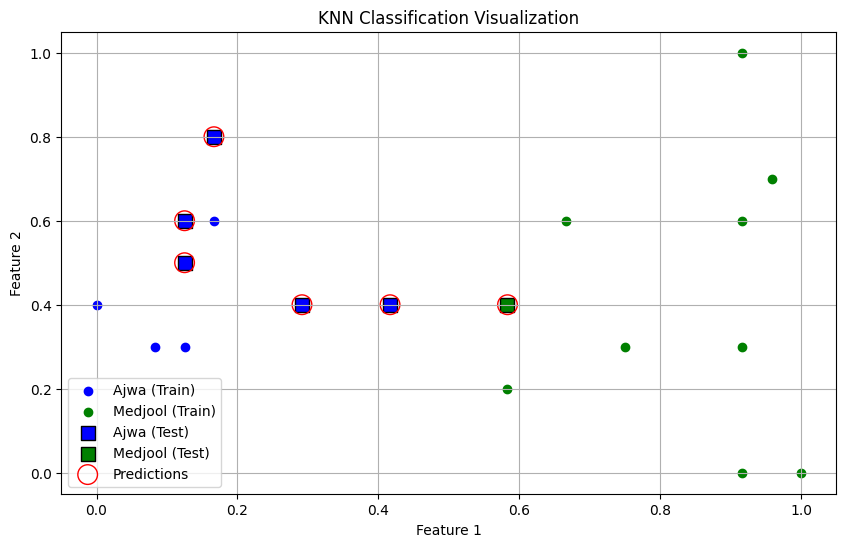

In [79]:
# Plot results
class_ajwa_train = X_train[y_train == 0]
class_medjool_train = X_train[y_train == 1]

class_ajwa_test = X_test[y_test == 0]
class_medjool_test = X_test[y_test == 1]

plt.figure(figsize=(10, 6))
plt.scatter(class_ajwa_train.iloc[:, 0], class_ajwa_train.iloc[:, 1], color='blue', label='Ajwa (Train)')
plt.scatter(class_medjool_train.iloc[:, 0], class_medjool_train.iloc[:, 1], color='green', label='Medjool (Train)')
plt.scatter(class_ajwa_test.iloc[:, 0], class_ajwa_test.iloc[:, 1], color='blue', edgecolor='black', label='Ajwa (Test)', marker='s', s=100)
plt.scatter(class_medjool_test.iloc[:, 0], class_medjool_test.iloc[:, 1], color='green', edgecolor='black', label='Medjool (Test)', marker='s', s=100)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], facecolors='none', edgecolors='r', marker='o', s=200, label='Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('KNN Classification Visualization')
plt.grid(True)
plt.show()

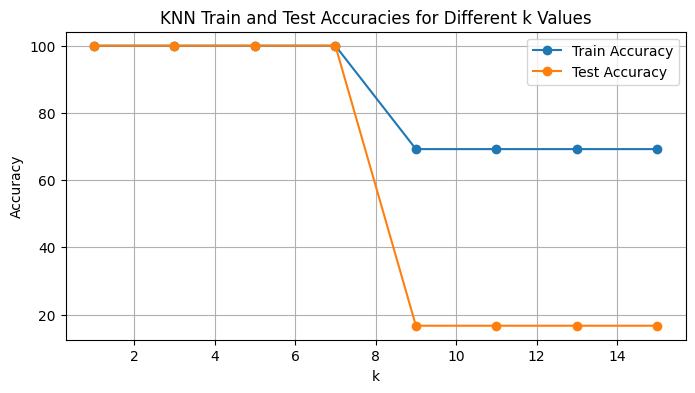

In [80]:
# Plotting the accuracies
plt.figure(figsize=(8, 4))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Train and Test Accuracies for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

#### Hasil dan Analisis

- Nilai k yang Optimal: Berdasarkan grafik, nilai k yang optimal berada pada kisaran k = 3 hingga k = 7, dimana akurasi pengujian masih tinggi dan stabil. Akurasi pengujian mulai turun tajam setelah k = 7.

- Overfitting: Pada nilai k = 1, model menunjukkan akurasi pelatihan yang sangat tinggi (100%) dan akurasi pengujian juga sangat tinggi (100%). Namun, pada umumnya k yang terlalu kecil seperti k = 1 cenderung menunjukkan tanda-tanda overfitting karena model terlalu kompleks dan sangat sensitif terhadap data pelatihan.

- Underfitting: Pada nilai k yang lebih besar (k > 7), baik akurasi pelatihan maupun pengujian menurun tajam. Misalnya, untuk k = 9 dan seterusnya (k = 11, 13, 15), akurasi pengujian mendekati 0%, menunjukkan bahwa model menjadi terlalu sederhana dan tidak dapat menangkap pola dalam data, yaitu underfitting yang sangat parah.

#### Kesimpulan

- Disarankan memilih nilai k di sekitar 3 hingga 7 untuk model KNN ini untuk menjaga akurasi pengujian tetap tinggi.

- Hindari nilai k yang lebih besar dari 7 karena akan menyebabkan underfitting yang signifikan.

- Evaluasi lebih lanjut dengan menggunakan lebih banyak data, karena data pada model yang kami buat cenderung sangat sedikit sehingga hasil yang didapat tidak konsisten.
